---
toc: true
comments: true
layout: post
title: STOCK ML model outpout
courses: { csp: {week: 16} }
type: hacks
permalink: stockml
---


In [117]:
import yfinance as yf

In [118]:
sp500 = yf.Ticker("^GSPC") #enables us to download for a single stock. GSPC is the S&P500 index
sp500 = sp500.history(period="max") # Query the historical prices. Passing period = max which querys data even from the beginning when the index was created
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-20 00:00:00-04:00,5181.689941,5226.189941,5171.549805,5224.620117,4064850000,0.0,0.0
2024-03-21 00:00:00-04:00,5253.430176,5261.100098,5240.660156,5241.529785,4207730000,0.0,0.0
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,0.0,0.0


In [119]:
sp500.index #Display index; THE DATE COLUMN

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-03-13 00:00:00-04:00', '2024-03-14 00:00:00-04:00',
               '2024-03-15 00:00:00-04:00', '2024-03-18 00:00:00-04:00',
               '2024-03-19 00:00:00-04:00', '2024-03-20 00:00:00-04:00',
               '2024-03-21 00:00:00-04:00', '2024-03-22 00:00:00-04:00',
               '2024-03-25 00:00:00-04:00', '2024-03-26 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24174, freq=None)

<Axes: xlabel='Date'>

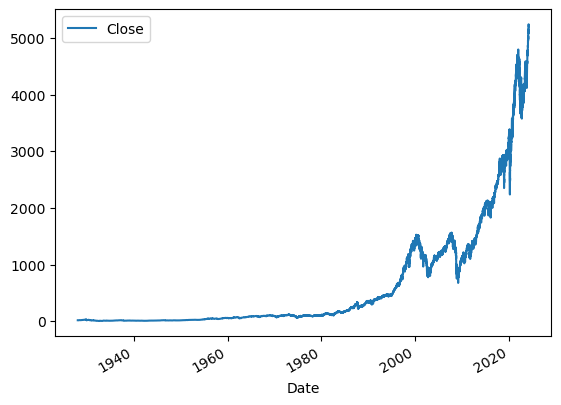

In [120]:
sp500.plot.line(y="Close", use_index=True) # creating a chart in which the y-axis is the closing price and the x-axis is the date


In [121]:
del sp500["Dividends"]
del sp500["Stock Splits"] 
# deleting unnecessary columns in data. Data cleanup

In [122]:
sp500["Tomorrow"]= sp500["Close"].shift(-1) # Setting the new tomorrow column equal to the close column of the next days data. Pandas shift method. 
sp500 #on the graph the close column value is the tomorrow value on the row above

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-03-20 00:00:00-04:00,5181.689941,5226.189941,5171.549805,5224.620117,4064850000,5241.529785
2024-03-21 00:00:00-04:00,5253.430176,5261.100098,5240.660156,5241.529785,4207730000,5234.180176
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,5218.189941


In [123]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # returns a boolean (1 or 0) saying if tomorrow is greater then todays price


In [124]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-03-20 00:00:00-04:00,5181.689941,5226.189941,5171.549805,5224.620117,4064850000,5241.529785,1
2024-03-21 00:00:00-04:00,5253.430176,5261.100098,5240.660156,5241.529785,4207730000,5234.180176,0
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,5218.189941,0


In [125]:
sp500 = sp500.loc["1990-01-01":].copy() #pandas LOC method, basically saying only use data where the index is at least 1990-01-01


In [126]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-03-20 00:00:00-04:00,5181.689941,5226.189941,5171.549805,5224.620117,4064850000,5241.529785,1
2024-03-21 00:00:00-04:00,5253.430176,5261.100098,5240.660156,5241.529785,4207730000,5234.180176,0
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,5218.189941,0


In [127]:
from sklearn.ensemble import RandomForestClassifier #random forest classifier trains multiple decision trees based of many randomized parameters then taking the average of those decision trees. 
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) # n_estimators = # of decision trees we want to train, random_state = if we run the same model twice the random numbers generated will be the same.
train = sp500.iloc[:-100] #iloc stops dataleakage from the future into the model
test = sp500.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"] #a list of all the parameters in our dataset we want to use to help predict targer
#cant use target or tomorrow column because then the model knows the future. Not a real world application. INSIDER TRADING?
model.fit(train[predictors], train["Target"]) #train the predictors to attempt to predict the Target column





RandomForestClassifier(min_samples_split=100, random_state=1)

In [128]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])# generating prediction and passing our predictors test set.
preds
#displays as a numpy array so hard to work with

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [129]:
preds = pd.Series(preds, index=test.index)
#formatted that array to align with the test index. 
precision_score(test["Target"], preds)


0.65

<Axes: xlabel='Date'>

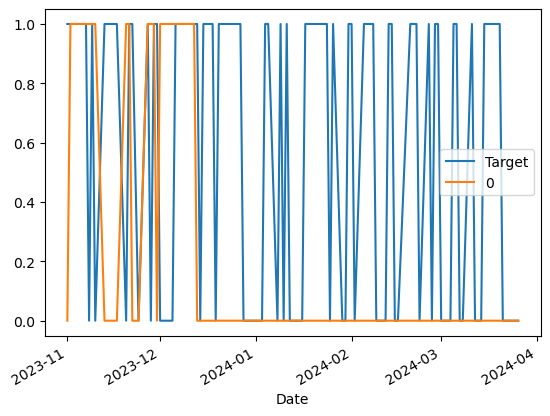

In [130]:
combined = pd.concat([test["Target"], preds], axis=1) #concatinating the actual and predicted value
combined.plot()


In [131]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [132]:
def backtest(data, model, predictors, start=2500, step=250): #start: taking 10 yrs of data. Trading yr is typically 250 days. 
    #take the 1st 12 yrs of data to predict 13th yr and so on
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [101]:
predictions = backtest(sp500, model, predictors)


In [102]:
predictions["Predictions"].value_counts() #value counts counts how many times each prediction was made


0    3522
1    2602
Name: Predictions, dtype: int64

In [103]:
#predicted market would go down at 3522 days
#predicted market would go up at 2602 days

In [104]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5292083013066872

In [105]:
#when modle claimed the market would go up, it actuall went up ab 53% of the time

In [106]:
predictions["Target"].value_counts() / predictions.shape[0]
# actual percentage of the market going up or going down

1    0.534618
0    0.465382
Name: Target, dtype: float64

In [107]:
#market went up 53% of days making our prediction fairly accurate

In [108]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-03-20 00:00:00-04:00,5181.689941,5226.189941,5171.549805,5224.620117,4064850000,5241.529785,1
2024-03-21 00:00:00-04:00,5253.430176,5261.100098,5240.660156,5241.529785,4207730000,5234.180176,0
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,5218.189941,0
